In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt

stock="POWERGRID.NS"
start=dt.datetime(2000,1,1)
end=dt.datetime.now()

df=yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.545422,35.424689,26.900117,29.051480,855215656
2007-10-08,30.879328,33.645365,30.685219,33.645365,126671715
2007-10-09,32.982174,33.273335,29.229421,30.895512,116725709
2007-10-10,33.289501,33.968879,32.998340,33.839473,67931378
2007-10-11,37.009903,38.821577,32.998342,38.821577,106320954


In [4]:
df.shape

(4304, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4304 entries, 2007-10-05 to 2025-03-20
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4304 non-null   float64
 1   (High, POWERGRID.NS)    4304 non-null   float64
 2   (Low, POWERGRID.NS)     4304 non-null   float64
 3   (Open, POWERGRID.NS)    4304 non-null   float64
 4   (Volume, POWERGRID.NS)  4304 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 201.8 KB


In [6]:
df.isnull().sum()

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4304.000000,4304.000000,4304.000000,4304.000000,4.304000e+03
mean,84.298713,85.396369,83.217107,84.341831,1.191596e+07
std,70.575269,71.421334,69.696896,70.577346,2.041085e+07
min,19.001734,20.312198,17.036038,20.213913,0.000000e+00
25%,36.665737,37.219214,36.151784,36.739346,4.865265e+06
50%,60.965389,61.976484,60.004643,60.755237,8.474453e+06
75%,85.016178,85.868883,84.043395,85.192999,1.371863e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [8]:
df.columns

MultiIndex([( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [9]:
df=df.reset_index()

In [10]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.545422,35.424689,26.900117,29.051480,855215656
1,2007-10-08,30.879328,33.645365,30.685219,33.645365,126671715
2,2007-10-09,32.982174,33.273335,29.229421,30.895512,116725709
3,2007-10-10,33.289501,33.968879,32.998340,33.839473,67931378
4,2007-10-11,37.009903,38.821577,32.998342,38.821577,106320954


In [11]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [12]:
data01=df.to_csv("POWERGRID.csv")
data01=pd.read_csv("POWERGRID.csv")
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.5454216003418,35.4246891776911,26.90011689528922,29.051480080819935,855215656
2,1,2007-10-08,30.87932777404785,33.6453646841474,30.685219073914716,33.6453646841474,126671715
3,2,2007-10-09,32.982173919677734,33.273334876563496,29.229420508905978,30.89551235079529,116725709
4,3,2007-10-10,33.28950119018555,33.96887948189164,32.99834031886197,33.839472943776364,67931378


In [13]:
#candlesticks charting
import plotly.graph_objects as go

fig=go.Figure(data=[go.Candlestick(x=data01['Date'],
                                   open=data01['Open'],
                                   high=data01['High'],
                                   low=data01['Low'],
                                   close=data01['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [14]:
df=df.drop(["Date"],axis=1)

<ipython-input-14-772ba5bd2516>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [15]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.545422,35.424689,26.900117,29.051480,855215656
1,30.879328,33.645365,30.685219,33.645365,126671715
2,32.982174,33.273335,29.229421,30.895512,116725709
3,33.289501,33.968879,32.998340,33.839473,67931378
4,37.009903,38.821577,32.998342,38.821577,106320954


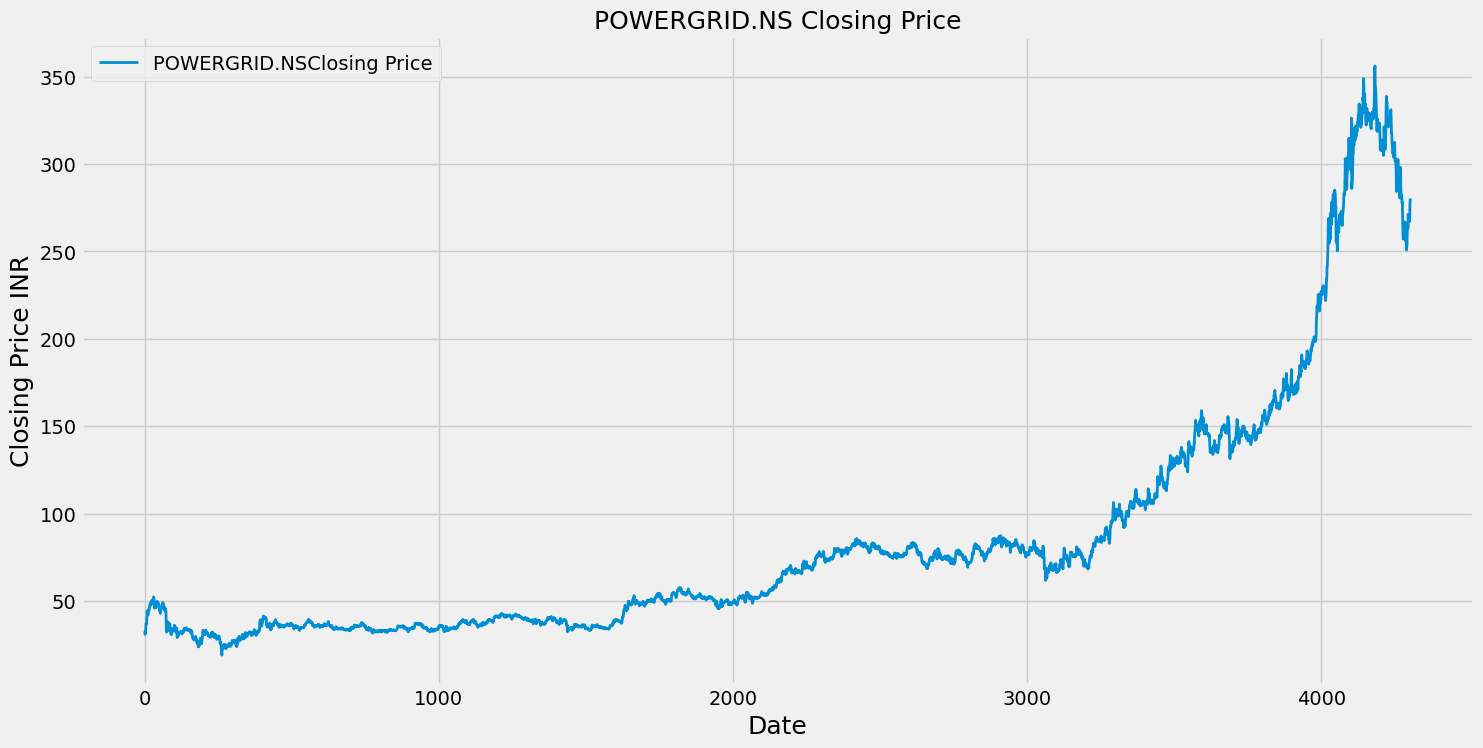

In [16]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'],label=f'{stock}Closing Price',linewidth=2)
plt.title(f'{stock} Closing Price',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price INR',fontsize=18)
plt.legend(loc='upper left')
plt.show()
#you can modify the variable and get any of the graphs for the
#closing price, open and as well as the volume

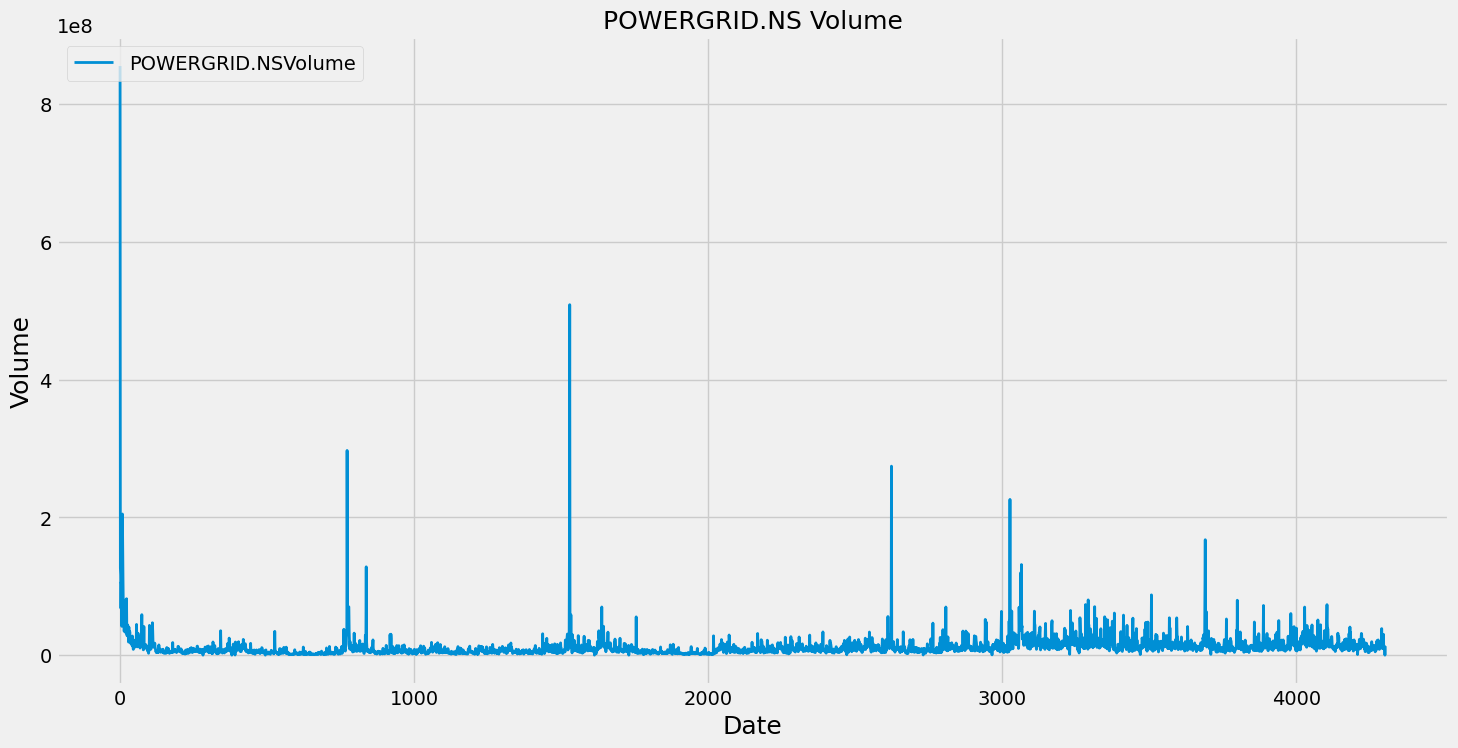

In [17]:
plt.figure(figsize=(16,8))
plt.plot(df['Volume'],label=f'{stock}Volume',linewidth=2)
plt.title(f'{stock} Volume',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Volume',fontsize=18)
plt.legend(loc='upper left')
plt.show()
#you can modify the variable and get any of the graphs for the
#closing price, open and as well as the volume

**MOVING AVERAGES**


In [18]:
ma50=df.Close.rolling(50).mean()

In [19]:
ma50.head(60)

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [20]:
ma100=df.Close.rolling(100).mean()

In [21]:
ma200=df.Close.rolling(200).mean()

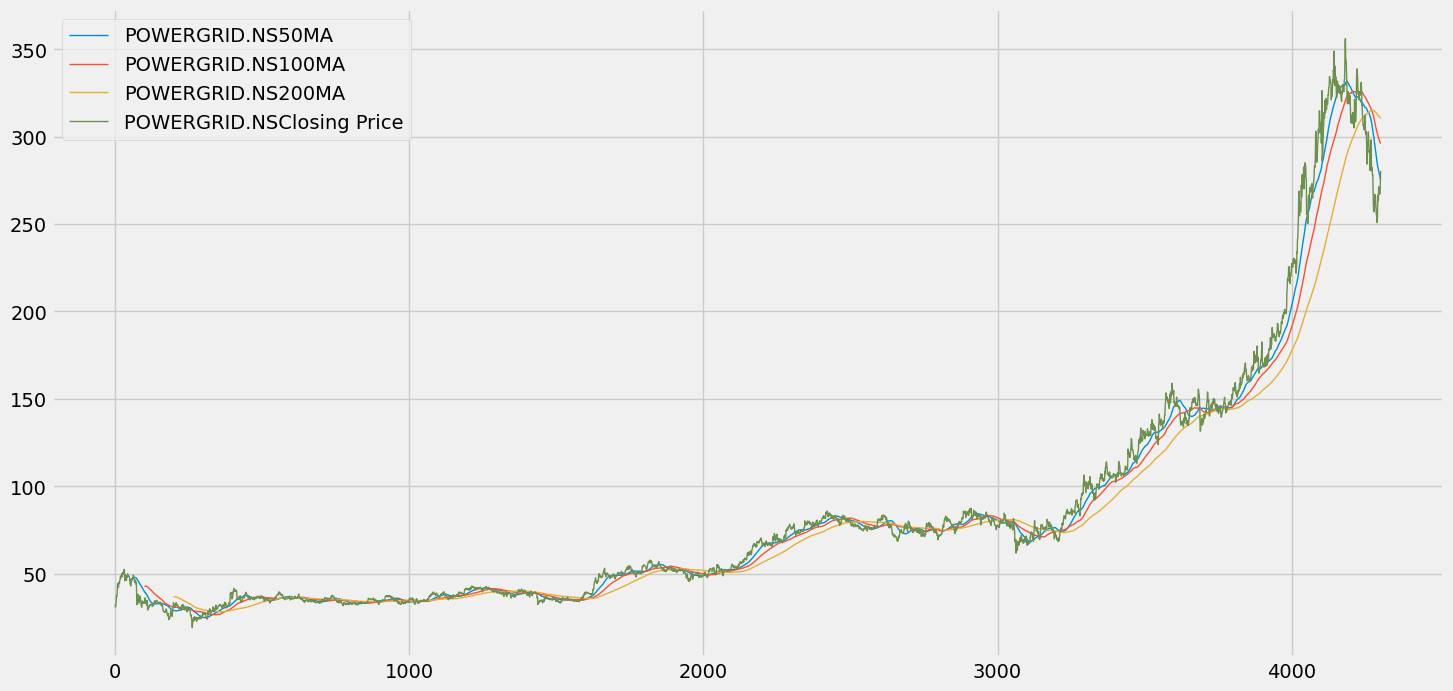

In [22]:
plt.figure(figsize=(16,8))
plt.plot(ma50,label=f'{stock}50MA',linewidth=1)
plt.plot(ma100,label=f'{stock}100MA',linewidth=1)
plt.plot(ma200,label=f'{stock}200MA',linewidth=1)
plt.plot(df['Close'],label=f'{stock}Closing Price',linewidth=1)
plt.legend()
plt.show()

In [23]:
ema100 = df.Close.ewm(span=100, adjust=False).mean()

In [24]:
ema50 = df.Close.ewm(span=50, adjust=False).mean()

In [25]:
ema200 = df.Close.ewm(span=200, adjust=False).mean()

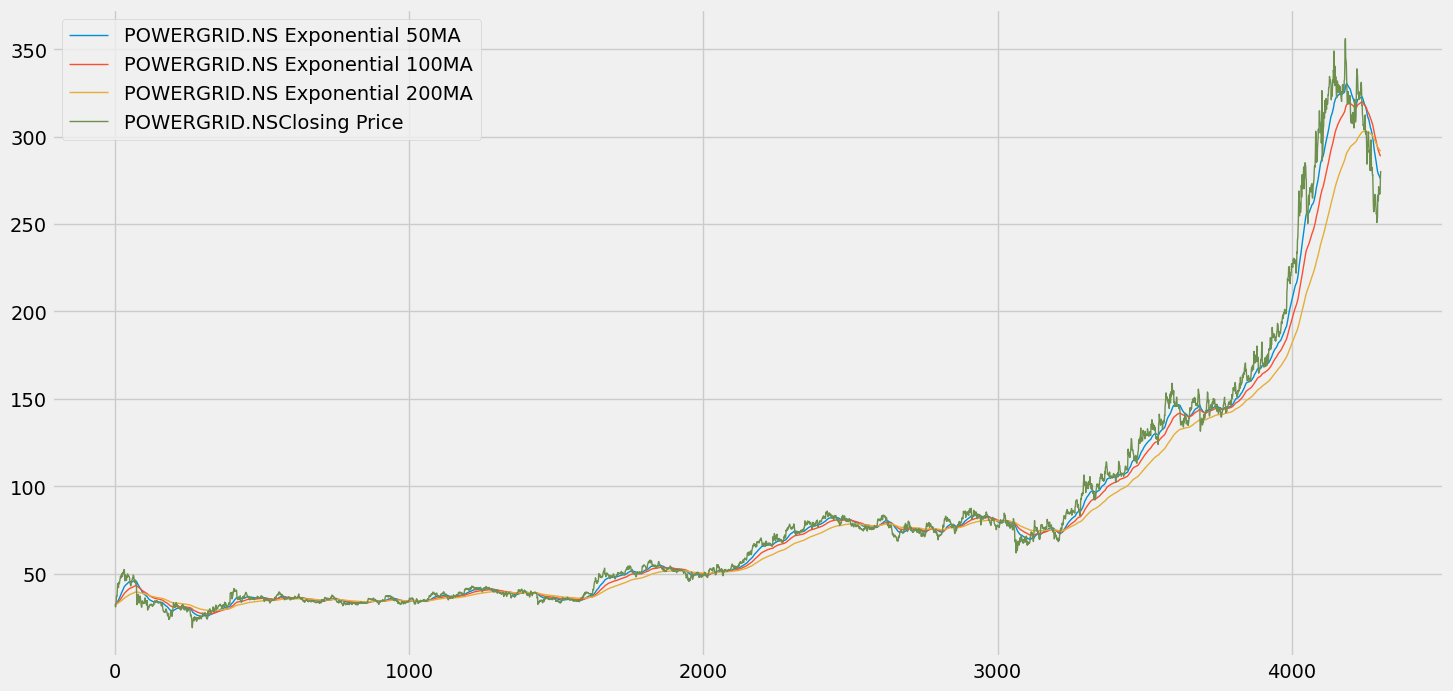

In [26]:
plt.figure(figsize=(16,8))
plt.plot(ema50,label=f'{stock} Exponential 50MA',linewidth=1)
plt.plot(ema100,label=f'{stock} Exponential 100MA',linewidth=1)
plt.plot(ema200,label=f'{stock} Exponential 200MA',linewidth=1)
plt.plot(df['Close'],label=f'{stock}Closing Price',linewidth=1)
plt.legend()
plt.show()

**LSTM**

In [27]:
#LSTM over RNN
#why this bcz
#LSTM has higher memeory component that can store the instances in the memory over the RNN as they have a shorter memory instancez

In [28]:
#Training nad testing divide

In [29]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [30]:
df.shape

(4304, 5)

In [31]:
data_training.shape

(3012, 1)

In [32]:
data_testing.shape

(1292, 1)

In [33]:
# the values are a continous values and are not suitable
# to use directly so we need the min max scaler

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [35]:
data_training_array=scaler.fit_transform(data_training)

In [36]:
data_training_array.shape

(3012, 1)

In [37]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [38]:
x_train

array([[[0.19808599],
        [0.17371819],
        [0.2044738 ],
        ...,
        [0.20092505],
        [0.20494692],
        [0.20683952]],

       [[0.17371819],
        [0.2044738 ],
        [0.20896868],
        ...,
        [0.20494692],
        [0.20683952],
        [0.23522921]],

       [[0.2044738 ],
        [0.20896868],
        [0.26338218],
        ...,
        [0.20683952],
        [0.23522921],
        [0.24966065]],

       ...,

       [[0.9808908 ],
        [1.        ],
        [0.97939812],
        ...,
        [0.83915484],
        [0.86453614],
        [0.87208991]],

       [[1.        ],
        [0.97939812],
        [0.92326526],
        ...,
        [0.86453614],
        [0.87208991],
        [0.87178785]],

       [[0.97939812],
        [0.92326526],
        [0.9050522 ],
        ...,
        [0.87208991],
        [0.87178785],
        [0.90351422]]])

In [39]:
#model building sequencial model

In [40]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [41]:
# LSTM input = 3D array(batch size , time steps, seq length)
# LSTM output can be 2D or 3D

# 2D->(batch size , units)
# 3D->(batchsize, timesteps, units)

In [42]:
model=Sequential()

In [43]:
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [44]:
model.add(Dropout(0.2))

In [45]:
model.add(LSTM(units=60,activation='relu',return_sequences=True))

In [46]:
model.add(Dropout(0.3))

In [47]:
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

In [48]:
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

In [49]:
model.add(Dense(units=1))

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [52]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 0.0785
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0081
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0078
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0068
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0059
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0054
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0054
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0053
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0051
Epoch 10/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0047
Epoch 11/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0047
Epoch 12/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0044
Epoch 13/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0040
Epoch 14/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0037
Epoch 15/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0039
Epo

In [53]:
past_100_days=data_training.tail(100)

In [54]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [55]:
input_data=scaler.fit_transform(final_df)

In [56]:
final_df.head()

Ticker,POWERGRID.NS
0,82.127937
1,80.882660
2,81.188881
3,82.760796
4,82.474991


In [57]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test,y_test=np.array(x_test),np.array(y_test)

In [58]:
y_pred=model.predict(x_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step


In [59]:
y_pred.shape

(1292, 1)

In [61]:
scaler.scale_

array([0.00339719])

In [62]:
scaler_factor=1/0.00339719

In [63]:
y_pred=y_pred*scaler_factor
y_test=y_test*scaler_factor

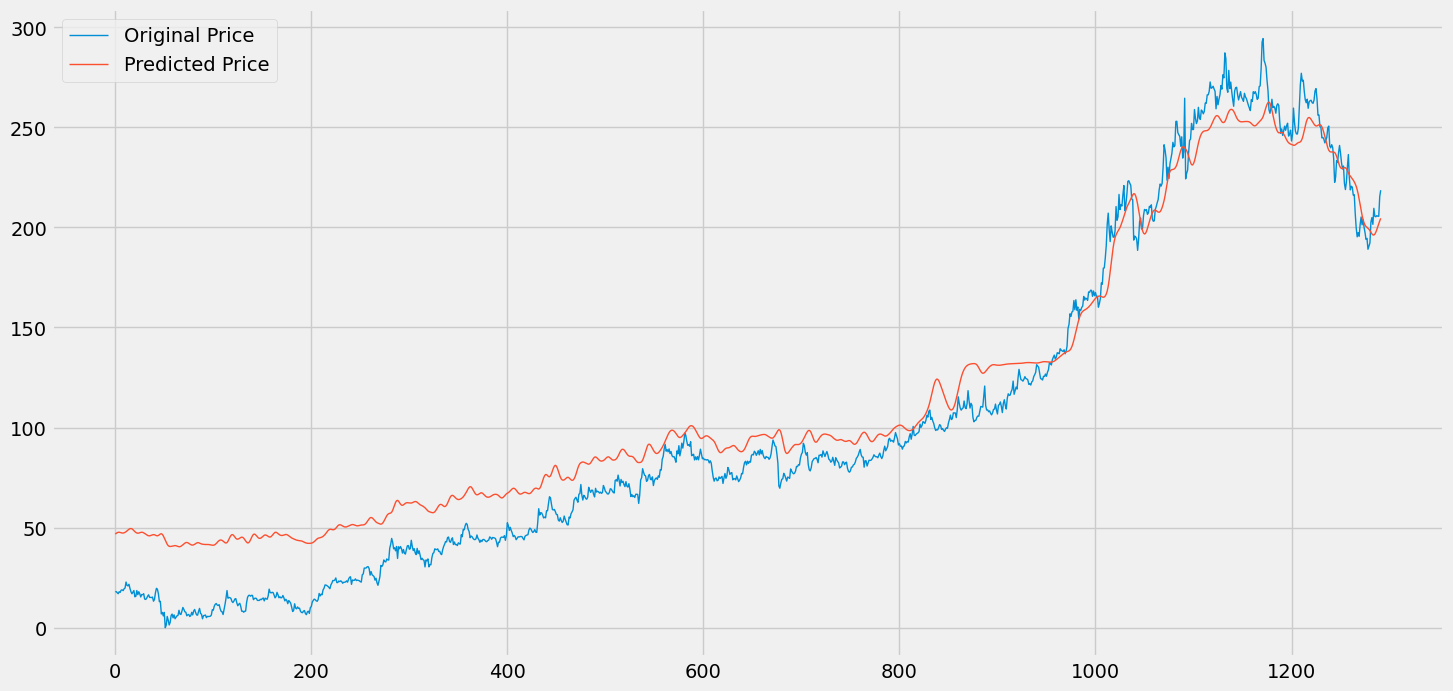

In [67]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label="Original Price",linewidth=1)
plt.plot(y_pred,label="Predicted Price",linewidth=1)
plt.legend()
plt.show()

In [66]:
model.save("Stock_dl_model.h5")